<a href="https://colab.research.google.com/github/Hcardenass/RedNeuronal-Celsius-a-Fahrenheit/blob/main/Red_Neuronal_Celsius_a_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf  #Libreria para inteligencia artificial echa por google
import numpy as np #trabajar con arreglos numericos

In [26]:
#Declaramos un arreglo de numeros que seran las entradas de celsius y otro de resultados de fahrenheit
Celsius = np.array([-20, -12, 0, 5, 15, 28, 35], dtype=float)
Fahrenheit = np.array([-4, 10.4, 32, 41, 59, 82.4, 95], dtype=float)



In [27]:
#Diseñar el modelo de red neuronal y se usar el framework Keras que permite hacer las redes de manera simple

capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])   #hay varios tipos de modelos pero en este caso se usara uno secuencial


#capa1 =tf.keras.layers.Dense(units=3, input_shape=[1])
#capa2 =tf.keras.layers.Dense(units=3, input_shape=[1])
#salida =tf.keras.layers.Dense(units=1)
#modelo = tf.keras.Sequential([capa1,capa2,salida])

In [28]:
#Ahora lo compilamos y preparamos el modelo y establecemos algunas propiedades de como queremos que procese esasmatematicas para poder aprender mejor
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1), #Adam:permite a la red como ajustar los pesos y sesgos eficientemente para que aprenda y no desaprenda, para eso se coloca la tasa de aprendizaje, si colocas uno pequeño aprendera poco a poco pero si el numero es muy grande puede pasarse del numero esperado y no podra hacer cambios finos para llegar a la mejor opcion
    loss='mean_squared_error'   #Funcion de perdida que considera que una poca cantidad de errores grandes es peor que una gran cantidad de errores pequeños
)

In [29]:
print("Comenzando Entrenamiento")
historial = modelo.fit(Celsius,Fahrenheit,epochs=400,verbose=False)  #Para entrenar funcion fit  y establecemos el numero de vueltas
print("Modelo Entrenado")

Comenzando Entrenamiento
Modelo Entrenado


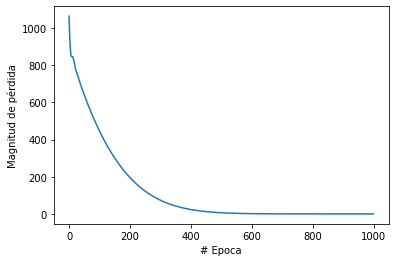

In [30]:
#ver grafico de resultado de la funcion de perdida donde nos dice que tan mal estan los resultados de la red en cada vuelta que dio
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [31]:
print("Hagamos una predicción")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " Fahrenheit")

Hagamos una predicción
El resultado es [[212.01888]] Fahrenheit


In [32]:
print("Mostrar variables internas del modelo")
print(capa.get_weights())
#print(capa1.get_weights())
#print(capa2.get_weights())
#print(salida.get_weights())

Mostrar variables internas del modelo
[array([[1.8004172]], dtype=float32), array([31.977154], dtype=float32)]


In [ ]:
#Exportar el modelo en formato h5
modelo.save('Red_Neuronal_Celsius_a_Fahrenheit.h5')

In [ ]:
#El equipo es Linux. Listemos el contenido de la carpeta actual para ver que se exporto el modelo
!ls

Red_Neuronal_Celsius_a_Fahrenheit.h5  sample_data


In [ ]:
#Para convertirlo a tensorflow.js, primero debemos instalar la libreria
!pip install tensorflowjs

     |████████████████████████████████| 64 kB 3.1 MB/s 


In [ ]:
#Crear carpeta donde se colocaran los archivos resultantes
!mkdir carpeta_salida

In [ ]:
#Realizar la exportacion a la carpeta de salida
!tensorflowjs_converter --input_format keras Red_Neuronal_Celsius_a_Fahrenheit.h5 carpeta_salida

In [ ]:
#Confirmar que en la carpeta de salida se hayan generado los archivos. Deben aparecer archivos "bin" y "json"
!ls carpeta_salida

group1-shard1of1.bin  model.json
